## Antony Owino. Final Paper. 13<sup>th</sup> Dec 2017. Notebook 1.

The corpus is a CSV file with 9 TV shows _Supernatural_, _Game of Thrones_, _The Walking Dead_, _Stranger Things_, _Grey's Anatomy_, _Arrow_, _Suits_, _The Originals_, _Pretty Little Liars_.

Note: This is the first notebook in analysing the dataset and shows. It should be run prior to any other accompanying notebook since it splits the corpus into shows and seasons as well as does sorting on the columns. There are 5 columns in  the original dataset *New_Query_2017_12_08.csv*: 
  * Name – Name of the TV Show
  * Season – Season number
  * id – Database Storage ID number
  * date_created – Date the question was posted
  * body – The question

### Initial Cleanup Activities
  * Split the corpus into TV shows – creates directories with the shows datasets
  * Split the TV shows into seasons – Exports every season of a show after sorting the contents using the unix timestamp parameter. Only 2 columns are need here (date_created and body)

In [1]:
import csv, os, errno, shutil
from itertools import groupby
from operator import itemgetter
import pandas as pd
import glob

# get current directory we are standing on now
current_working_dir = os.getcwd()

# Everytime this cell is run. Remove all the directories in this directory
# since they will be recreated and populated again below
for dir_file in os.listdir(current_working_dir):
    file_path = os.path.join(current_working_dir, dir_file)
    try:
         # remove all directories since they will be created afresh below
        if os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(e)

# open the original dataset and iterate through it creating
# separate datasets of each show
with open("New_Query_2017_12_08.csv", "rt", encoding='utf8') as main_csv_file:
    reader = csv.DictReader(main_csv_file)
    for show_name, rows in groupby(reader, itemgetter('Name')):
        try:
            # create a directory with same name as TV show
            os.makedirs(show_name)
        except OSError as e:
            pass
        show_file = os.path.join(show_name, show_name + ".csv")
        file_exists = os.path.isfile(show_file)
        with open(show_file, "a+") as show_outfile:
            writer = csv.DictWriter(show_outfile, reader.fieldnames)
            if not file_exists:
                writer.writeheader()  # file doesn't exist yet, write a header row
            writer.writerows(rows)

# initialize an ordered list of TV shows
shows = ["Supernatural",
         "Game of Thrones",
         "The Walking Dead",
         "Stranger Things",
         "Grey's Anatomy",
         "Arrow",
         "Suits",
         "The Originals",
         "Pretty Little Liars"]

# split the TV show files further by seasons dropping some of the
# columns that are redundant at this level.
# Also create CSV file with all the questions of a TV show in chronological
# order.
for show_name in shows:
    show_file = os.path.join(show_name, show_name + ".csv")
    file_exists = os.path.isfile(show_file)
    
    df = pd.read_csv(show_file)           
    keep_body_col = ['date_created', 'body'] # remain with 2 columns only
    body_df = df[keep_body_col]
    body_df = body_df.sort_values(['date_created'], ascending=[1]) 
    questions_file = os.path.join(show_name, show_name + "_questions_only.csv")
    body_df.to_csv(questions_file, index=False)
    
    with open(show_file, "rt", encoding='utf8') as show_csv_file:
        seasons_list = []
        show_reader = csv.DictReader(show_csv_file)
        for season, show_rows in groupby(show_reader, itemgetter('Season')):
            season_file = os.path.join(show_name, season + ".csv")
            seasons_list.append(season)
            file_exists = os.path.isfile(season_file) 
            with open(season_file, "a+") as season_outfile:
                season_writer = csv.DictWriter(season_outfile, show_reader.fieldnames)
                if not file_exists:
                    season_writer.writeheader()  # file doesn't exist yet, write a header

                # toss show name and season columns, i.e. r[0] and r[1]
                # rewritten_show_rows = list((sr[2], sr[3], sr[4]) for sr in show_rows)
                season_writer.writerows(show_rows)

        # another loop that sorts the season questions by timestamps
        for season in seasons_list:
            season_file = os.path.join(show_name, season + ".csv")
            f=pd.read_csv(season_file)           
            keep_col = ['date_created','body']
            new_f = f[keep_col]
            new_f = new_f.sort_values(['date_created'], ascending=[1]) 
            new_f.to_csv(season_file, index=False)

### Sampling the datasets with _Supernatural_

We text the above processes by extract and doing sample text analysis on one of the shows.

In [2]:
from pprint import pprint
import os
from IPython.display import display
import numpy as np    

all_supernatural_questions_file = os.path.join(shows[0], shows[0]) + "_questions_only.csv"
raw_supernatural_questions_list = []
with open(all_supernatural_questions_file, 'r') as file: # This makes sure that file is closed after reading
    data = csv.reader(file)
    next(data) #  skip the header row
    for row in data:
        raw_supernatural_questions_list.append((row[0],row[1])) # This puts all the data into a list
    
# We create a pandas dataframe with the data:
data = pd.DataFrame(data=[question[1] for question in raw_supernatural_questions_list], columns=['Questions'])
data['Timestamp'] = np.array([pd.to_datetime(question[0],unit='s') for question in raw_supernatural_questions_list])

# show a subset of the first 10 and last 10 questions
display(data.head(10), data.tail(10))

,Questions,Timestamp
0,whats the name of that erry song,2010-05-07 01:32:30
1,what song is playing for 28-29 minutes? when D...,2011-06-24 20:14:19
2,"hi....short guitar intro at 19:50-19:58, when ...",2011-07-15 20:02:29
3,"Who is the guitarist that actually performed ""...",2011-08-24 16:36:40
4,Anyone know the the music at the very end? Whi...,2011-08-28 20:50:57
5,I am searching for the song that plays ao 10mi...,2011-09-26 21:29:15
6,What's the name of ringtone in Deans cellphone???,2011-11-08 06:42:43
7,are you sure about the name?cause i cann't fin...,2011-11-16 03:50:20
8,What is the music / song that is playing when ...,2012-01-09 18:51:27
9,What is the name of the song playing when Cast...,2012-03-24 14:20:06


,Questions,Timestamp
413,what's the song in the last scene with castiel...,2017-10-18 21:24:37
414,What is the song that plays in the background ...,2017-10-20 20:39:14
415,Who did the last song in this episode,2017-11-10 02:17:53
416,What was the first song that Athena was listen...,2017-11-17 02:32:57
417,What was the song playing in the backround whe...,2017-11-18 19:21:33
418,anyone knows what is playing while James tryin...,2017-11-21 16:53:53
419,What is the song the girl plays on the guitar ...,2017-12-01 01:45:23
420,what song plys between breaks,2017-12-08 05:02:20
421,"Since this is a promo, which could depend on w...",2017-12-08 10:41:33
422,"What's the cool jazz that plays at the start, ...",2017-12-08 11:01:24


#### Getting sample statistics from the show

In [3]:
import nltk
from collections import Counter

# get the first TV show in the list of shows
show_file = os.path.join(shows[0], shows[0]) + ".csv"

questions_text = ''
with open(show_file, 'r') as file: # This makes sure that file is closed after reading
    data = csv.reader(file)
    next(data) #  skip the header row
    for row in data:
        questions_text += row[4] # This puts all the data into a list
    file.close() 

# word_tokens_re = re.findall(r'[A-Z][A-Za-z\'\-]+', full_corpus)
word_tokens_nltk = nltk.word_tokenize(questions_text)
lower_case_tokens = [token.lower() for token in word_tokens_nltk if token[0].isalpha()]
    
stopwords = nltk.corpus.stopwords.words('english')

the_lower_content_words = []
for token in lower_case_tokens:
    if token not in stopwords:
        the_lower_content_words.append(token)

# tabulated word count
word_freqs = nltk.FreqDist(the_lower_content_words)
word_freqs.tabulate(12)

tokenized_words = [word for word in lower_case_tokens if word not in stopwords]
the_word_count = Counter(tokenized_words)
top_20 = the_word_count.most_common(20)

   song    dean     sam episode playing   music     end    know    name  played  anyone   plays 
    304     154     105     101      81      74      74      70      61      50      50      45 


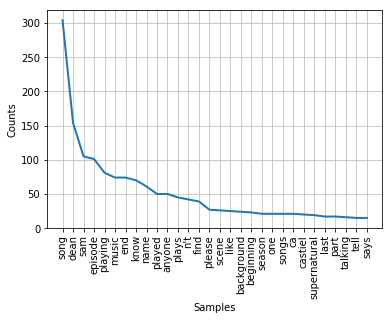

In [4]:
# showing plottings via terminal rather than window popup
%matplotlib inline
word_freqs.plot(30)

#### Sample of extraction of "time-like" strings from the datasets using regex

In [5]:
import re

# Extract times
times = re.findall(r"\d\d:\d\d", questions_text)
times = [str(x) for x in times]
times.sort()
print(times)

['08:35', '10:15', '11:30', '11:30', '13:03', '13:04', '13:40', '13:57', '13:57', '14:00', '14:07', '14:40', '14:42', '17:20', '17:36', '19:50', '19:50', '19:58', '23:27', '25:36', '28:50', '29:00', '29:50', '29:50', '30:31', '33:26', '33:27', '33:50', '36:15', '36:50', '37:13', '37:50', '38:00', '38:28', '39:20', '40:00', '40:00', '41:19']


### [Go to Notebook 2 (Within The Hour)](Analysis of Viewers Searching for Music Heard On Contemporary TV - Within The Hour.ipynb)